## About Dataset:

The data that we are going to use in this example is about cars. Specifically containing various information datapoints about the used cars, like their price, color, etc. Here we need to understand that simply collecting data isn’t enough. Raw data isn’t useful. Here data analysis plays a vital role in unlocking the information that we require and to gain new insights into this raw data.

Consider this scenario, our friend, Otis, wants to sell his car. But he doesn’t know how much should he sell his car for! He wants to maximize the profit but he also wants it to be sold for a reasonable price for someone who would want to own it. So here, us, being a data scientist, we can help our friend Otis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## DATA

In [25]:
raw_data = pd.read_csv('imports-85.csv')

In [26]:
headers = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
          'engine-location','wheel-base','lenght','width','height','curb-weight','engine-type','num-of-cylinders',
          'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
          'price']
data = raw_data.copy()
data.columns = headers
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [27]:
data.shape

(204, 26)

## PREPROCESSING

In [28]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
lenght               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Muchos campos de tipo object son en realidad numericos, el problema es que los espacios vacios estan remplazados con "?".
Paso a reemplazar el caracter y a cambiar el tipo de las columnas.

In [70]:
df = pd.DataFrame(data)
df = data.replace({'?':''})
#PASO TODAS LAS VARIABLES OBJECT QUE DEBEN SER NUMERICAS
df['price'] = pd.to_numeric(df['price'])
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['bore'] = pd.to_numeric(df['bore'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])

In [71]:
#data['engine-location'] = data['engine-location'].map({'front':1,'rear':0})
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
lenght               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [72]:
obj = (df.dtypes == 'object')
obj_cols = list(obj[obj].index)
print('Variables categoricas:', len(obj_cols))
int = (df.dtypes == 'int64')
int_cols = list(int[int].index)
print('Variables integer:', len(int_cols))
flt = (df.dtypes == 'float64')
flt_cols = list(flt[flt].index)
print('Variables float:', len(flt_cols))

Variables categoricas: 10
Variables integer: 5
Variables float: 11


<Axes: >

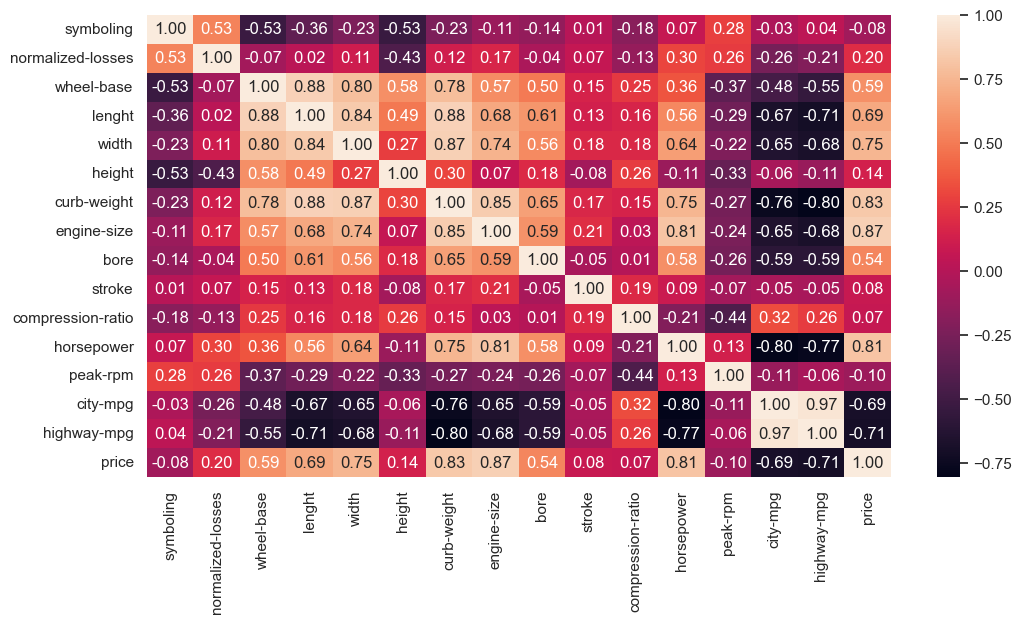

In [73]:
#EXPLORACION DE DATOS NUMERICOS

df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric.corr(), fmt='.2f', annot=True)

<Axes: title={'center': 'Valores unicos de datos categoricos'}>

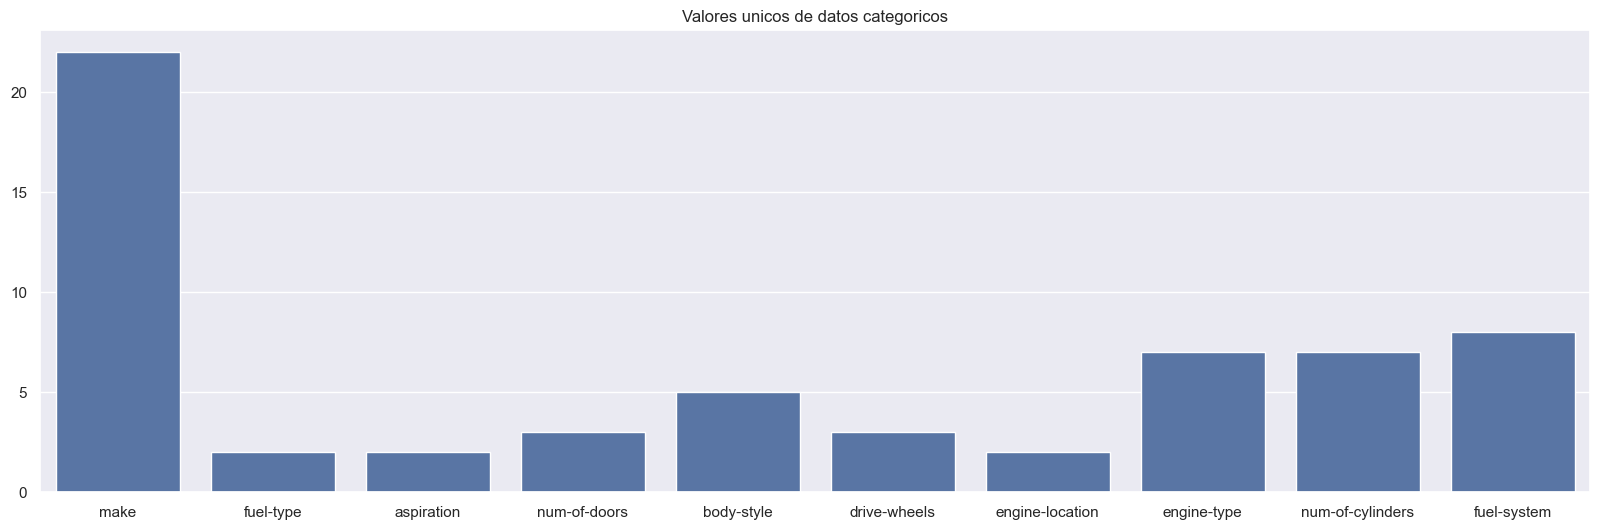

In [81]:
#EXPLORACION DE DATOS CATEGORICOS
unique_values = []
for col in obj_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(20,6))
plt.title('Valores unicos de datos categoricos')
sns.barplot(x=obj_cols, y=unique_values)

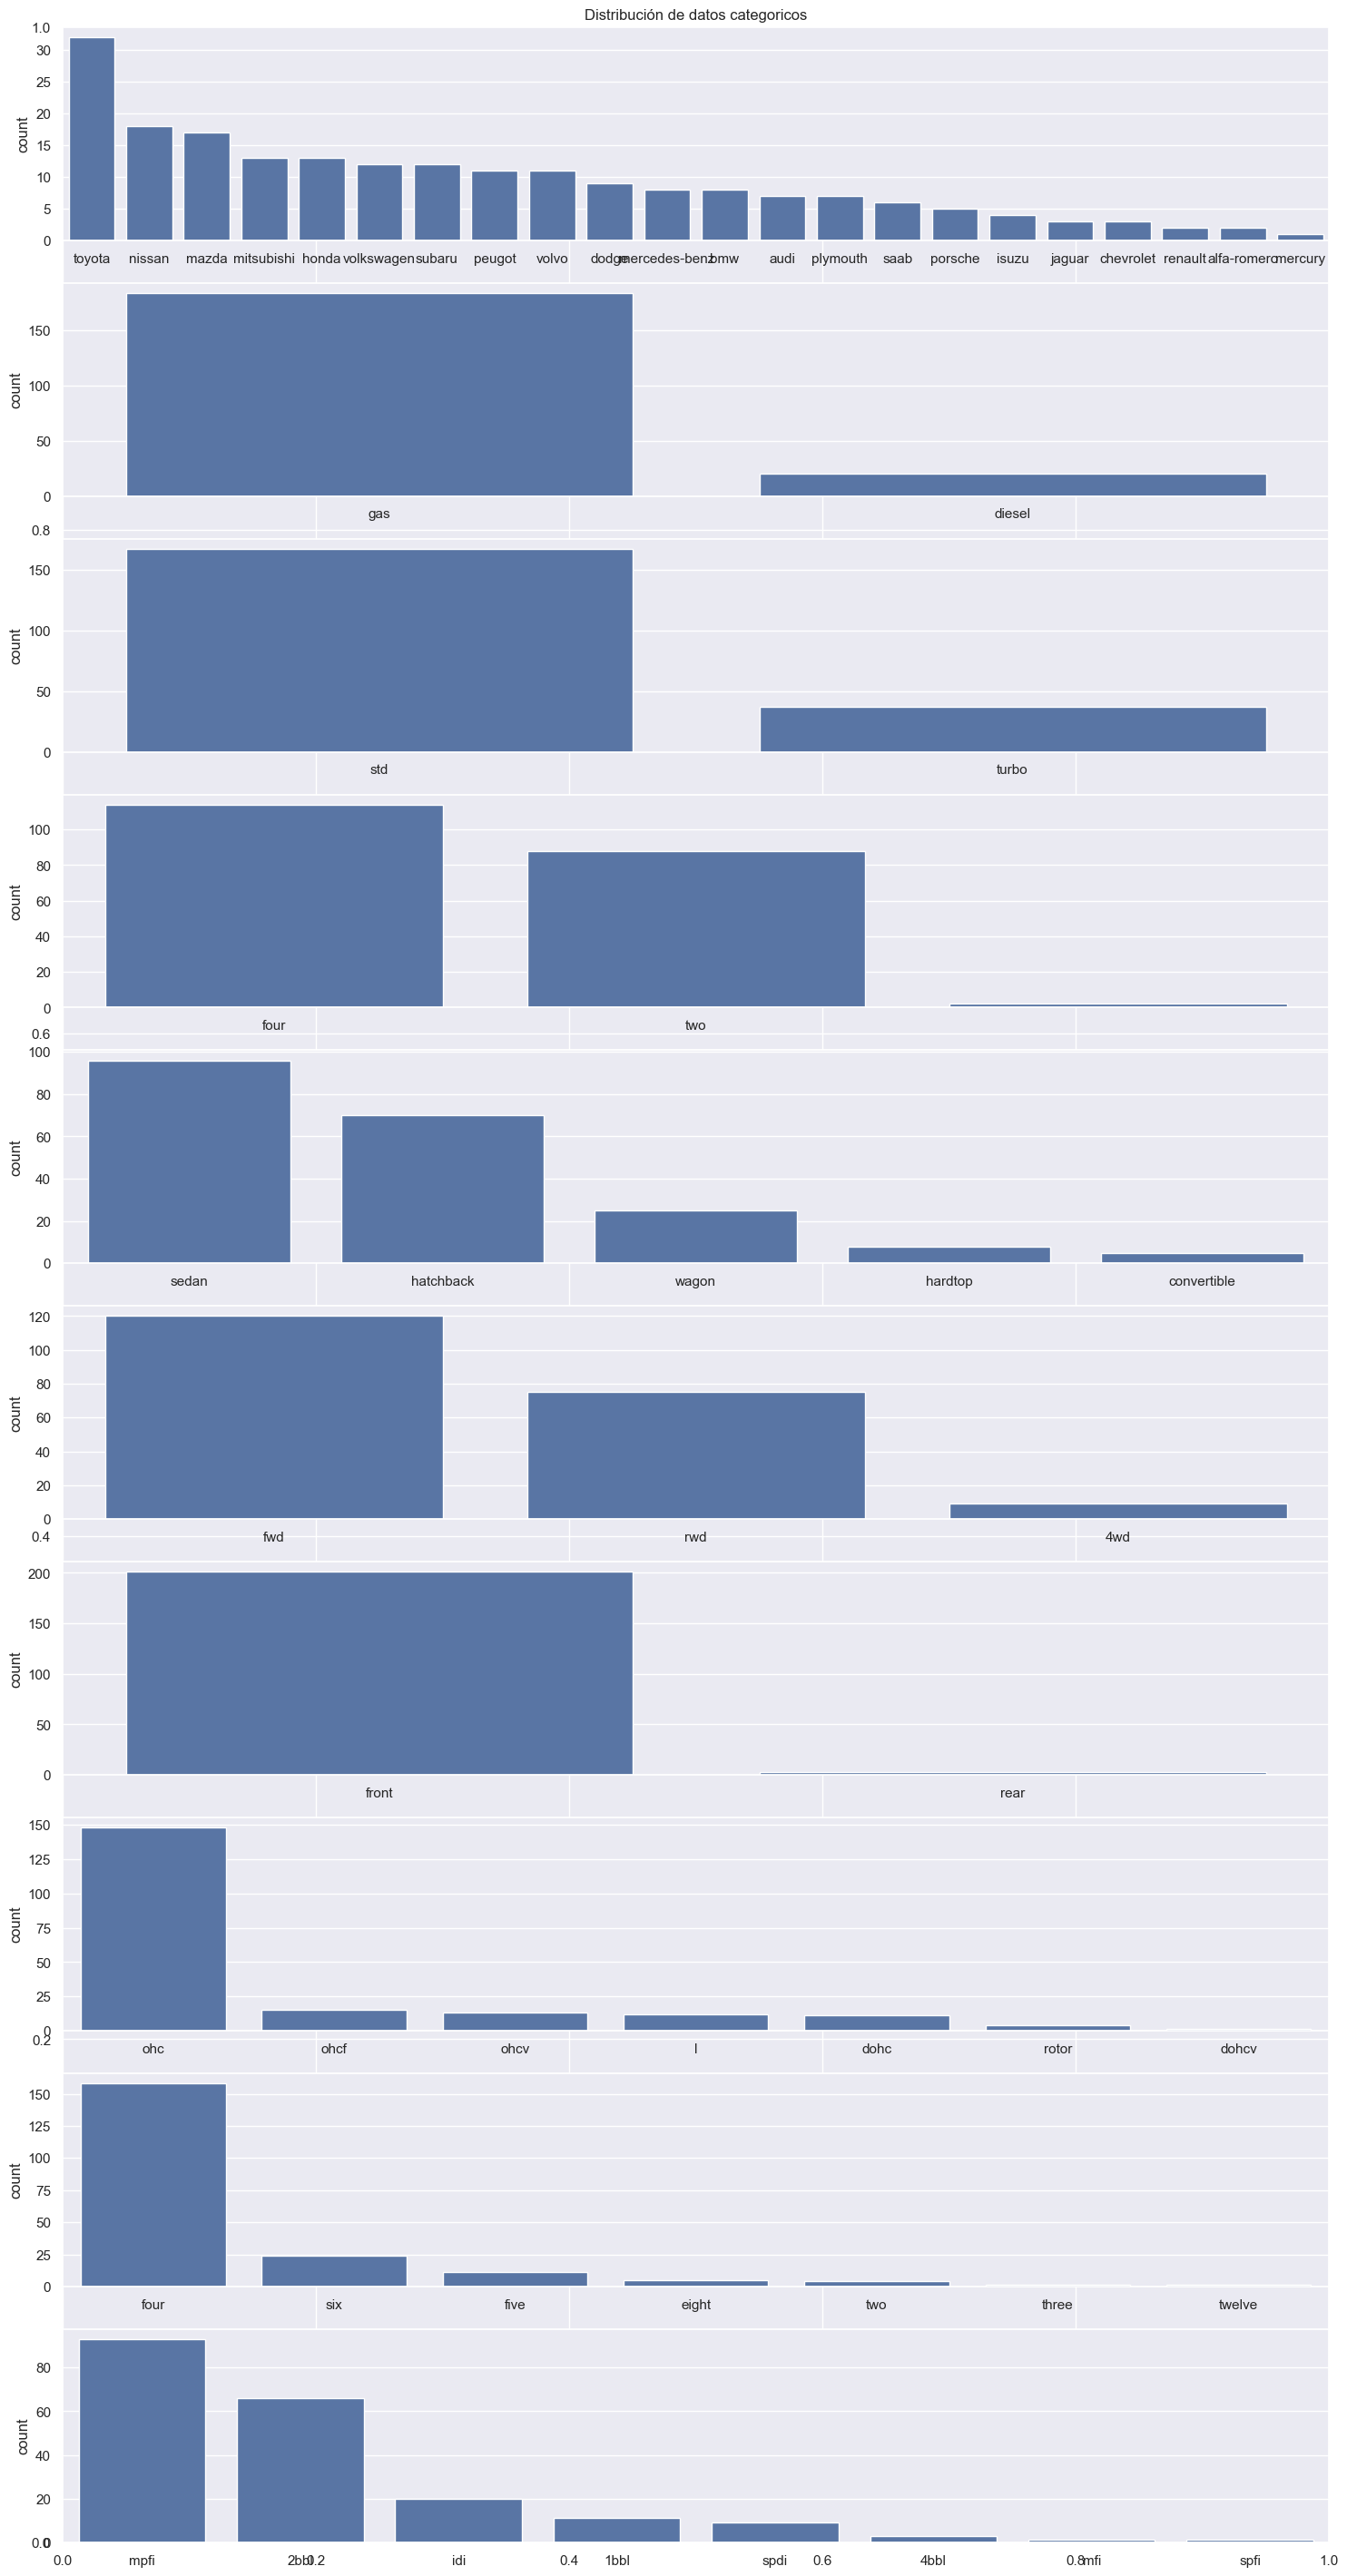

In [90]:
#VAMOS A VISUALIZAR LA CANTIDAD DE VARIABLES POR CADA VARIABLE CATEGORICA: 
#ya que vamos a tener que transformar algunas a numericas

plt.figure(figsize=(18,36))
plt.title('Distribución de datos categoricos')
index = 1

for col in obj_cols:
    y = df[col].value_counts()
    plt.subplot(10,1,index)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [102]:
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
lenght                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [104]:
#PASO A REEMPLAZAR TODOS LOS VALORES NUMERICOS QUE TIENEN NULL CON LA MEDIA DE LA CATEGORIA
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())
df['bore'] = df['bore'].fillna(df['bore'].mean())
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())
df['price'] = df['price'].fillna(df['price'].mean())

In [105]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
lenght               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [107]:
df = df.dropna()

## ONE-HOT PROCESS

In [134]:
from sklearn.preprocessing import OneHotEncoder

s = (df.dtypes == 'object')
objects_cols = list(s[s].index)
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[objects_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()

df_final = df.drop(obj_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

## TRAINING AND VALIDATION DATA

In [135]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['price'],axis=1)
Y = df_final['price']

In [136]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

## 1. SVM MODEL

In [139]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import svm
from sklearn.svm import SVC

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.35051432365104385

## RANDOM FOREST MODEL

In [147]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,Y_train)
Y_pred = model_RFR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.12697499200411438

## LINEAR REGRESSION

In [142]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.13739670187623743